In [3]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from scipy.stats import skew
#from collections import Counter
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
#from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
%matplotlib inline


In [4]:
#Expand columns in the table
pd.set_option('max_columns', None)

In [6]:
#Read data in dataframe
df=pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#delect null rows in diag_1
df=df[df['diag_1']!='?']

In [ ]:
#delet death patients
#df=df[df['discharge_disposition_id']!=11]

In [8]:
#replace ? with null
df.replace('?',np.NaN,inplace=True)

In [9]:
#drop duplicate patients
df['duplicado'] = df.patient_nbr.duplicated()
df = df[df['duplicado'] == False]
df.drop(['duplicado'], axis = 1, inplace = True)

In [127]:
#fill null
#df=df.fillna(-1)

In [12]:
#Explore data 
profile1 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile1

Summarize dataset:   0%|          | 0/65 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [249]:
#EDA=df.copy()
#EDA['readmitted']=EDA['readmitted'].apply(lambda x:1 if x=='<30' else 0)
EDA['gender'].replace('Unknown/Invalid',np.NaN,inplace=True)
EDA['race'].replace('Unknown/Invalid',np.NaN,inplace=True)

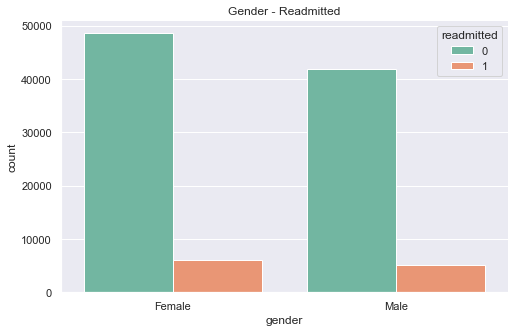

In [272]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.set_style('darkgrid')
gender = EDA.drop(EDA.loc[EDA["gender"]=="Unknown/Invalid"].index, axis=0)
sns.countplot(x = "gender", hue = "readmitted", data = gender)
plt.title("Gender - Readmitted")
sns.despine()
plt.show()

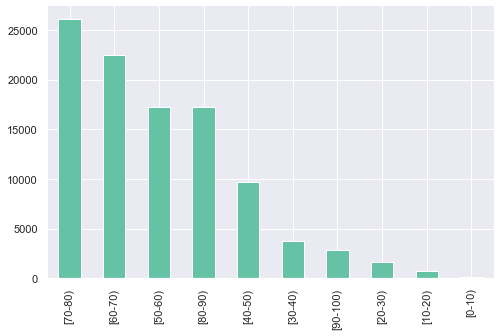

In [273]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
EDA.age.value_counts().plot(kind = 'bar')
sns.despine()


<AxesSubplot:xlabel='age', ylabel='count'>

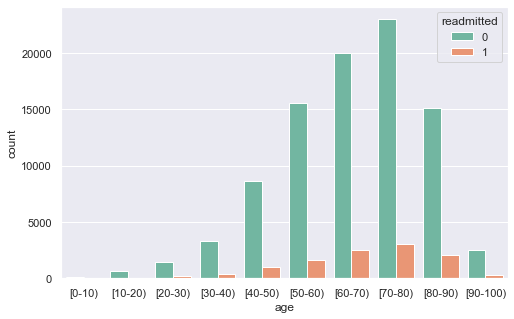

In [267]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.countplot(x="age", hue="readmitted", data=EDA)

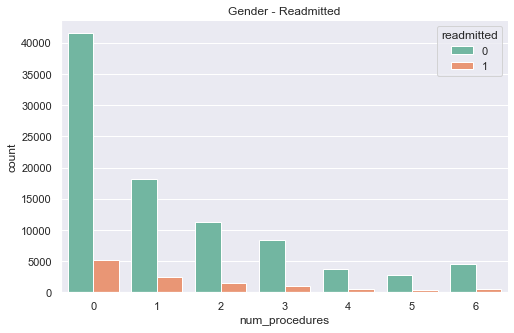

In [275]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.set_style('darkgrid')
sns.countplot(x = "num_procedures", hue = "readmitted", data = gender)
sns.despine()
plt.show()

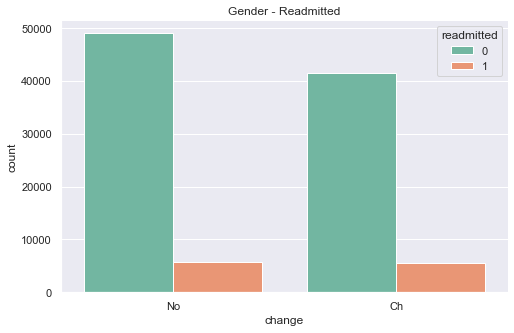

In [276]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.set_style('darkgrid')
sns.countplot(x = "change", hue = "readmitted", data = gender)
sns.despine()
plt.show()

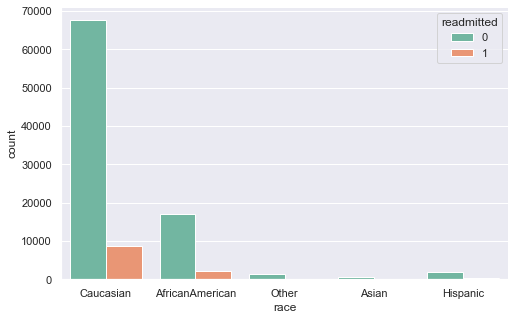

In [278]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.set_style('darkgrid')
gender = EDA.drop(EDA.loc[EDA["race"]=="?"].index, axis=0)
sns.countplot(x = "race", hue = "readmitted", data = gender)
sns.despine()
plt.show()

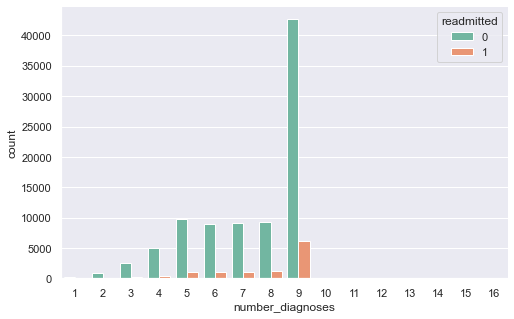

In [282]:
fig = plt.gcf()
fig.set_size_inches(8,5)
sns.set_style('darkgrid')
sns.countplot(x = "number_diagnoses", hue = "readmitted", data = gender)
sns.despine()
plt.show()

In [274]:
EDA.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

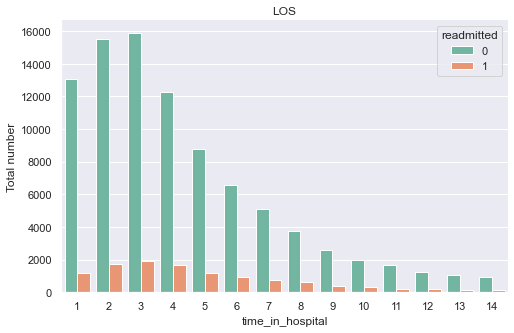

In [270]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
sns.countplot(x='time_in_hospital',hue='readmitted',data=EDA)
plt.title('LOS')
plt.xlabel('time_in_hospital')
plt.ylabel('Total number')
sns.despine()
plt.show()

In [10]:
### Functions

def maping(x,n):
    labels = x.astype('category').cat.categories.tolist()
    replace_map = {n: {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    return replace_map

def dia(x):
    if((int(x) in range(390, 460)) or (int(x) == 785)): #circulatory
        return 1
    if((int(x) in range(460, 520)) or (int(x) == 786)): #respiratory
        return 2
    if((int(x) in range(520, 580)) or (int(x) == 787)): #digestive
        return 3
    if(int(x) in range(250,251)): #diabetes
        return 4
    if(int(x) in range(800, 1000)): #injury
        return 5  
    if(int(x) in range(710, 740)): #musculoskeletal
        return 6
    if((int(x) in range(580, 630)) or (int(x) == 788)): #genitourinary
        return 7  
    if(int(x) in range(140, 240)): #neoplasms
        return 8  
    if(int(x) in range(630, 680)): #Other
        return 9  
    if(int(x) in range(280, 390)): #Other
        return 9
    if(int(x) in range(320, 460)): #Other
        return 9
    if(int(x) in range(360, 390)): #Other
        return 9
    if(int(x) in range(740, 760)): #Other
        return 9
    else:
        return 9
   
    
def medication1(x):
    if(x=='No'):
        return 0
    elif(x=='Steady'):
        return 0
    elif(x=='Up'):
        return 1
    elif(x=='Down'):
        return 1
    
def ageGroup(x):
    if(x=='[0-10)'):
        return 1
    elif (x=='[10-20)'):
        return 1
    elif(x=='[20-30)'):
            return 1
    elif (x=='[30-40)'):
         return 1  
    elif(x=='[40-50)'):
        return 2
    elif (x=='[50-60)'):
         return 3
    elif(x=='[60-70)'):
            return 4
    elif (x=='[70-80)'):
         return 5
    elif(x=='[80-90)'):
            return 6
    elif (x=='[90-100)'):
         return 6
    

In [11]:
#drop 12 columns that have more than 40% null, one category,Admmition IS
df.drop(['payer_code','medical_specialty','weight','acetohexamide', 'examide','citoglipton','metformin-pioglitazone','metformin-rosiglitazone',
      'glipizide-metformin','glimepiride-pioglitazone','troglitazone','tolbutamide','encounter_id'],axis=1,inplace=True) 

# 'metformin','repaglinide', 'nateglinide', 'chlorpropamide','tolazamide'

In [12]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [452]:
#Replace value 
df['admission_type_id'].replace({2:1,6:5,8:5},inplace=True)
df['admission_source_id'].replace({1:'A',2:'A',3:'A',7:'B',9:'E',17:'E',20:'E',21:'E',
                                  4:'C',5:'C',6:'C',10:'C',18:'C',22:'C',25:'C',26:'C',
                                   8:'C',11:'C',12:'C',13:'C',14:'C',23:'C',24:'C'
                                  },inplace=True)
df['admission_source_id'].replace({'A':1,'B':2,'C':3,'E':4},inplace=True)
df['discharge_disposition_id'].replace({7:'B',9:'B',20:'B',12:'B',13:'B',14:'B',25:'C',26:'C',18:'C'},inplace=True)
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x:x if (x=='B' or x=='C' ) else 'A')
df['discharge_disposition_id'].replace({'A':1,'B':2,'C':np.NaN},inplace=True)


In [14]:
#Missing to Null
df['admission_type_id'].replace({5:np.NaN},inplace=True)
#df['admission_source_id'].replace({'E':np.NaN},inplace=True)
df['discharge_disposition_id'].replace({25:np.NaN,26:np.NaN,18:np.NaN},inplace=True)
df['gender'].replace('Unknown/Invalid',np.NaN,inplace=True)
df['race'].replace('Unknown/Invalid',np.NaN,inplace=True)

In [15]:
#fill null 
df['admission_type_id'].fillna(df['admission_type_id'].mean(),inplace=True)
df['admission_source_id'].fillna(df['admission_source_id'].mean(),inplace=True)
df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].max(),inplace=True)
df['gender'].fillna('Female',inplace=True)
df['race'].fillna(1,inplace=True)
df['diag_1'].fillna(0,inplace=True)
df['diag_2'].fillna(0,inplace=True)
df['diag_3'].fillna(0,inplace=True)

In [16]:
#Replace categorical values
df['age']=df['age'].apply(lambda x: ageGroup(x))
df['change'].replace({'No': 0, 'Ch': 1},inplace=True)
df['gender'].replace({'Female':1,'Male':2},inplace=True)
df['readmitted']=df['readmitted'].apply(lambda x:1 if x=='<30' else 0)
df['A1Cresult'].replace({'None': 0, 'Norm': 0, '>7':1,'>8': 1},inplace=True)
df['max_glu_serum'].replace({'None': 0, 'Norm': 0,'>200': 1,'>300':1},inplace=True)
df['diabetesMed'].replace({'No': 0, 'Yes': 1},inplace=True)

In [17]:
#Replace categorical values
#Medications
df['repaglinide']=df['repaglinide'].apply(medication1)
df['glimepiride']=df['glimepiride'].apply(medication1)
df['glipizide']=df['glipizide'].apply(medication1)
df['glyburide']=df['glyburide'].apply(medication1)
df['pioglitazone']=df['pioglitazone'].apply(medication1)
df['rosiglitazone']=df['rosiglitazone'].apply(medication1)
df['acarbose']=df['acarbose'].apply(medication1)
df['miglitol']=df['miglitol'].apply(medication1)
df['insulin']=df['insulin'].apply(medication1)
df['metformin']=df['metformin'].apply(medication1)
df['nateglinide']=df['nateglinide'].apply(medication1)
df['chlorpropamide']=df['chlorpropamide'].apply(medication1)
df['glyburide-metformin']=df['glyburide-metformin'].apply(medication1)
df['tolazamide']=df['tolazamide'].apply(medication1)


In [18]:
#Replace categorical values
df.loc[((df['diag_1'].str.contains('E')==True) | (df['diag_1'].str.contains('V')==True)),'diag_1']=9
df['diag_1']=df['diag_1'].astype(float)
df['diag_1'].fillna(df['diag_1'].mean(),inplace=True)
df['diag_1']=df['diag_1'].apply(lambda x: dia(x))

df.loc[((df['diag_2'].str.contains('E')==True) | (df['diag_2'].str.contains('V')==True)),'diag_2']=9
df['diag_2']=df['diag_2'].astype(float)
df['diag_2'].fillna(df['diag_2'].mean(),inplace=True)
df['diag_2']=df['diag_2'].apply(lambda x: dia(x))

df.loc[((df['diag_3'].str.contains('E')==True) | (df['diag_3'].str.contains('V')==True)),'diag_3']=9
df['diag_3']=df['diag_3'].astype(float)
df['diag_3'].fillna(df['diag_3'].mean(),inplace=True)
df['diag_3']=df['diag_3'].apply(lambda x: dia(x))

In [19]:
#New column
df['Visits']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']
df['Chang_count']=df['insulin']+df['repaglinide']+df['glimepiride']+df['glipizide']+df['glyburide']+df['pioglitazone']+df['rosiglitazone']+df['acarbose']+df['miglitol']+df['metformin']+df['nateglinide']+df['chlorpropamide']+df['tolazamide']+df['glyburide-metformin']

In [20]:
df['race'].replace({'Caucasian':1,'AfricanAmerican':2,'Hispanic':3,'Asian':3,'Other':3},inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71509 entries, 0 to 101765
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               71509 non-null  int64  
 1   race                      71509 non-null  int64  
 2   gender                    71509 non-null  int64  
 3   age                       71509 non-null  int64  
 4   admission_type_id         71509 non-null  float64
 5   discharge_disposition_id  71509 non-null  float64
 6   admission_source_id       71509 non-null  int64  
 7   time_in_hospital          71509 non-null  int64  
 8   num_lab_procedures        71509 non-null  int64  
 9   num_procedures            71509 non-null  int64  
 10  num_medications           71509 non-null  int64  
 11  number_outpatient         71509 non-null  int64  
 12  number_emergency          71509 non-null  int64  
 13  number_inpatient          71509 non-null  int64  
 14  diag_

In [22]:
#select last visit of patients
df_lastVisit=df.groupby(by=['patient_nbr','readmitted'])[['Visits']].max()
df_lastVisit.reset_index(inplace=True)

In [23]:
df_lastVisit

,patient_nbr,readmitted,Visits
0,135,1,0
1,378,0,0
2,729,0,0
3,774,0,0
4,927,0,0
...,...,...,...
71504,189351095,0,0
71505,189365864,0,0
71506,189445127,0,0
71507,189481478,0,0


In [24]:
df=pd.merge(df,df_lastVisit, on=['patient_nbr','readmitted','Visits'],how='right')

In [25]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted,Visits,Chang_count
0,135,1,1,3,2.0,1.0,1,8,77,6,33,0,0,0,1,5,3,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1
1,378,1,1,3,3.0,1.0,1,2,49,1,11,0,0,0,6,9,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,729,1,1,6,1.0,3.0,7,4,68,2,23,0,0,0,5,2,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,774,1,1,6,1.0,1.0,7,3,46,0,20,0,0,0,9,1,1,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,927,2,1,1,1.0,1.0,7,5,49,0,5,0,0,0,7,8,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71504,189351095,1,1,6,1.0,1.0,7,1,73,1,11,0,0,0,9,1,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71505,189365864,3,2,4,1.0,1.0,7,3,56,1,8,0,0,0,7,4,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
71506,189445127,1,1,6,1.0,1.0,7,3,39,0,18,0,0,0,2,1,6,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,2
71507,189481478,1,1,2,1.0,4.0,7,14,69,0,16,0,0,0,9,9,4,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,2


In [26]:
#Impalanced class
df['readmitted'].value_counts()

0    65218
1     6291
Name: readmitted, dtype: int64

In [27]:
del df['patient_nbr']

In [28]:
df.sort_values(by='readmitted',ascending=False,inplace=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted,Visits,Chang_count
0,1,1,3,2.0,1.0,1,8,77,6,33,0,0,0,1,5,3,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1
15610,1,2,6,2.0,28.0,4,7,25,1,14,0,0,0,1,4,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
65291,1,2,5,1.0,1.0,7,2,39,0,8,0,0,0,1,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15614,1,1,5,1.0,28.0,7,2,40,0,15,0,0,0,1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
65296,1,2,4,3.0,1.0,1,12,62,0,18,0,0,0,9,9,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24792,1,1,1,3.0,1.0,1,4,38,3,5,0,0,0,3,7,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24793,1,2,4,1.0,22.0,7,8,63,0,16,0,0,0,1,4,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
24794,1,2,3,1.0,6.0,7,5,11,0,11,0,0,1,9,9,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
24795,2,2,3,1.0,27.0,2,14,71,0,25,0,0,0,9,1,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
df2=df.copy()

In [30]:
#UnderSampling
df=df.head(12588)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted,Visits,Chang_count
0,1,1,3,2.0,1.0,1,8,77,6,33,0,0,0,1,5,3,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1
15610,1,2,6,2.0,28.0,4,7,25,1,14,0,0,0,1,4,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
65291,1,2,5,1.0,1.0,7,2,39,0,8,0,0,0,1,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15614,1,1,5,1.0,28.0,7,2,40,0,15,0,0,0,1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
65296,1,2,4,3.0,1.0,1,12,62,0,18,0,0,0,9,9,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39823,1,2,4,3.0,1.0,1,1,33,6,11,0,0,0,1,1,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
39824,1,2,6,2.0,1.0,4,3,39,2,14,0,0,0,3,2,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
39825,2,2,4,1.0,1.0,7,7,48,0,7,0,0,0,9,1,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39827,3,2,3,1.0,1.0,7,2,44,0,9,0,0,0,1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
df=df.sample(frac=1)

In [32]:
#Split data 
y = df[['readmitted']]
X = df.drop('readmitted',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=70)


In [391]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted', 'Visits',
       'Chang_count'],
      dtype='object')

In [33]:
df=df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide',
       'glyburide-metformin'],axis=1)

In [34]:
df=df.fillna(0)

In [35]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,Visits,Chang_count
47345,2,2,5,6.0,1.0,17,2,52,0,10,0,4,0,2,1,1,9,0,0,0,0,1,0,4,0
13892,1,1,5,1.0,3.0,5,7,57,0,16,0,0,0,1,1,9,9,0,0,0,0,1,1,0,0
18643,2,2,2,1.0,1.0,7,3,34,3,16,0,0,0,4,9,1,9,0,1,0,1,1,1,0,0
51523,1,2,6,1.0,22.0,7,9,62,0,15,0,0,0,1,2,1,9,0,0,0,1,1,0,0,0
21241,2,2,5,1.0,1.0,7,2,43,1,9,0,0,0,2,9,9,6,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2,1,6,1.0,1.0,7,6,51,0,8,0,0,0,9,9,3,5,0,0,0,0,1,1,0,0
48711,1,2,4,2.0,1.0,4,2,41,1,11,2,1,1,3,3,9,5,0,0,0,0,1,0,4,0
47733,1,2,4,1.0,1.0,7,4,43,2,11,0,1,0,1,2,1,7,0,1,0,0,1,0,1,0
65610,1,1,6,1.0,3.0,7,7,61,2,14,0,0,0,1,1,7,9,0,0,0,0,0,1,0,0


In [168]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [169]:
#X_train_smote,y_train_smote=smote.fit_resample (x_trains,Y_train)

In [36]:
boosting2 = GradientBoostingClassifier()
boosting2.fit(X_train,y_train)
boosting2.score(X_test, y_test)
#boostingP2 = boosting2.predict(X_test)

C:\Users\alenizima5\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6513105639396346

In [37]:
boostingP2= boosting2.predict(X_test)

In [46]:

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, boostingP2)
auc = metrics.roc_auc_score(y_test, boostingP2)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, boostingP2)
precision = metrics.precision_score(y_test, boostingP2)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, boostingP2, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.65
Auc: 0.65
Recall (all 1s predicted right): 0.59
Precision (confidence when predicting a 1): 0.67
Detail:
              precision    recall  f1-score   support

           0       0.64      0.72      0.67      1267
           1       0.67      0.59      0.63      1251

    accuracy                           0.65      2518
   macro avg       0.65      0.65      0.65      2518
weighted avg       0.65      0.65      0.65      2518



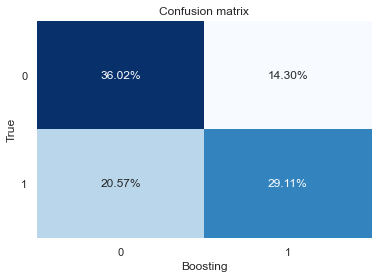

In [49]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, boostingP2, labels=classes)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=plt.cm.Blues, cbar=False)#sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Boosting", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=200)#max_features='sqrt'
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

<ipython-input-38-27cd84f9586f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)


0.6334392374900715

In [39]:
print ('Score:',clf.score(X_test,y_test))
RF_prediction= clf.predict(X_test)

Score: 0.6334392374900715


<AxesSubplot:xlabel='feature'>

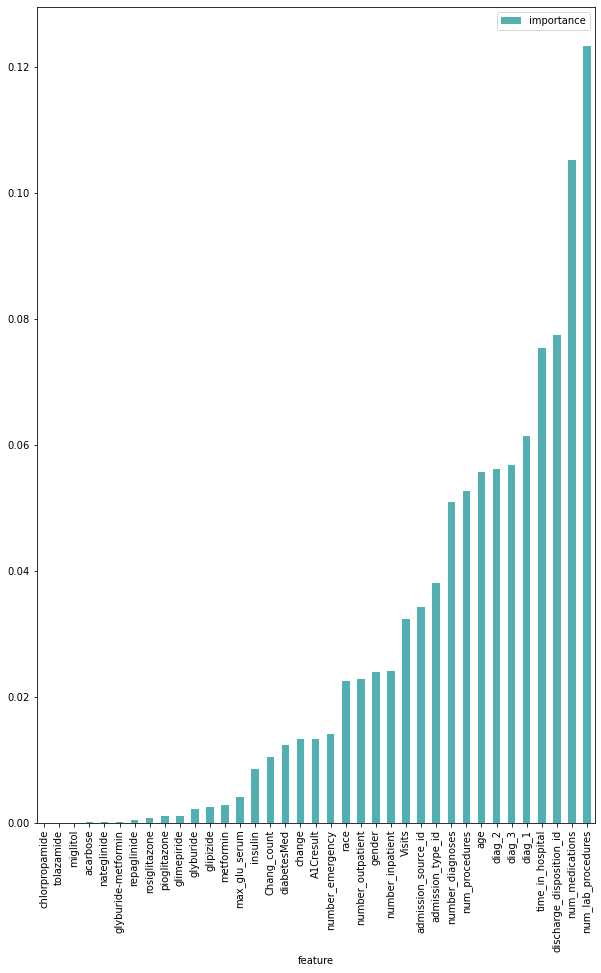

In [40]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='bar', figsize=(10, 15),color='#52b0b3')

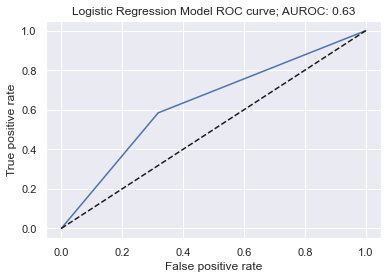

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, RF_prediction)#decision_tree,RF_prediction
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, RF_prediction), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

In [42]:

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, RF_prediction)
auc = metrics.roc_auc_score(y_test, RF_prediction)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, RF_prediction)
precision = metrics.precision_score(y_test, RF_prediction)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, RF_prediction, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.63
Auc: 0.63
Recall (all 1s predicted right): 0.58
Precision (confidence when predicting a 1): 0.64
Detail:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1267
           1       0.64      0.58      0.61      1251

    accuracy                           0.63      2518
   macro avg       0.63      0.63      0.63      2518
weighted avg       0.63      0.63      0.63      2518



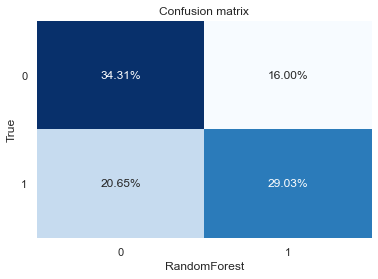

In [43]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, RF_prediction, labels=classes)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=plt.cm.Blues, cbar=False)#sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="RandomForest", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.5806195393169182

In [290]:
decision_tree_pre= decision_tree.predict(X_test)

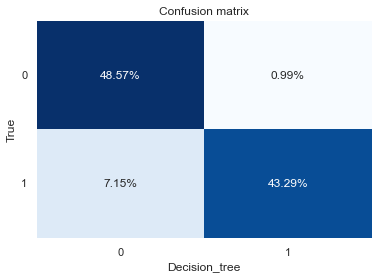

In [304]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, decision_tree_pre, labels=classes) #RF_prediction
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=plt.cm.Blues, cbar=False)#sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Decision_tree", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

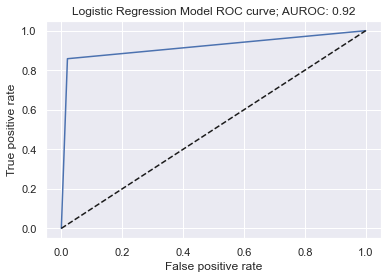

In [295]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_pre)#decision_tree,RF_prediction
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, decision_tree_pre), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

<AxesSubplot:xlabel='feature'>

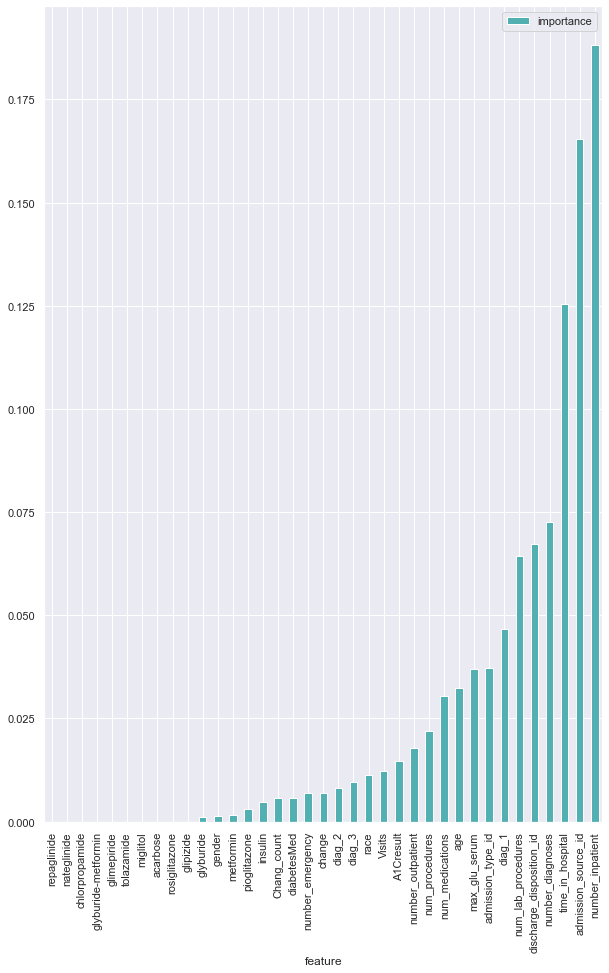

In [314]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = boosting2.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='bar', figsize=(10, 15),color='#52b0b3')

In [301]:

## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, decision_tree_pre)
auc = metrics.roc_auc_score(y_test, decision_tree_pre)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, decision_tree_pre)
precision = metrics.precision_score(y_test, decision_tree_pre)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, decision_tree_pre, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.92
Auc: 0.92
Recall (all 1s predicted right): 0.86
Precision (confidence when predicting a 1): 0.98
Detail:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1248
           1       0.98      0.86      0.91      1270

    accuracy                           0.92      2518
   macro avg       0.92      0.92      0.92      2518
weighted avg       0.93      0.92      0.92      2518



In [219]:
#XS_copy=X_train_smote.copy()
#YS_copy=y_train_smote.copy()

In [324]:
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted,Visits,Chang_count
0,8222157,1,1,1,7.0,2.0,1,1,41,0,1,0,0,0,4,9,9,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0
1,55629189,1,1,1,1.0,1.0,2,3,59,0,18,0,0,0,9,4,9,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
2,86047875,2,1,1,1.0,1.0,2,2,11,5,13,2,0,1,9,4,9,6,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0
3,82442376,1,2,1,1.0,1.0,2,2,44,1,16,0,0,0,9,4,1,7,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
4,42519267,1,2,2,1.0,1.0,2,1,51,0,8,0,0,0,8,8,4,5,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,183087545,1,1,5,1.0,1.0,2,9,50,2,33,0,0,0,3,3,4,9,-1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
101755,188574944,3,1,2,1.0,1.0,2,14,73,6,26,0,1,0,7,7,2,9,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1
101756,140199494,3,1,4,1.0,1.0,2,2,46,6,17,1,1,1,5,7,1,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0
101758,120975314,1,1,6,1.0,1.0,2,5,76,1,22,0,1,0,9,9,9,9,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1
